 Declan Halbert - U79196431

# CS 237 Lab 1 
- What this lab covers:
    - Basic introduction to Python and Jupyter Notebook.
    - Basic introduction to Monte Carlo (probability) simulation. 



# Anaconda Distribution of Python 
- Download from https://www.continuum.io/downloads
    - Make sure it's Python 3! 
    - Be sure to pick the correct Operating System (i.e., Windows, MAC OS, Linux)

# Numpy Library

We will make extensive use of the numpy library in this course. Numpy provides very efficient implementation of lists as arrays, as well as functions which operate point-wise on such arrays. This is a powerful and elegant way to write code!  The basic ideas should be clear from the examples below; read a extensive tutorial here: https://docs.scipy.org/doc/numpy-dev/user/quickstart.html


# Starting Jupyter 
- Open a Terminal Window 
    - For MAC OS, open your Applications folder, then open the Utilities folder. Open the Terminal application. (Or, type "terminal" into Spotlight.) You may want to add this to your dock.
    - For Windows, simply search for CMD and run the result
- In the terminal run $\texttt{jupyter notebook}$
- This will bring you to the home page. 
- Click new and then click python3 to create a new Ipython3 notebook.
- If you do not want to use Jupyter and would rather develop your code in a usual IDE, type $\texttt{spyder}$ in the command prompt instead. 
    - Alternatively, use the Anaconda Navigator that will be installed in folder anaconda was installed to. 


In [2]:
# Here are some imports which will be used in the code in the rest of the lab

# Jupyter notebook specific 
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

# Imports used for the code in CS 237
# @Author: Kai Bernardini (kaidb@bu.edu)
# Due Date: TBD
import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting


from numpy.random import seed, randint, uniform
from collections import Counter

%matplotlib inline

# Plotting in Python
- We will be using Matplotlib for plotting and graphing.
- There are four functions that we will make use of: scatter(...), bar(...), plot(...), and hist(....)


# Plotting Points
- Use the scatter(...) function to plot points from a list of x values and the associated y values

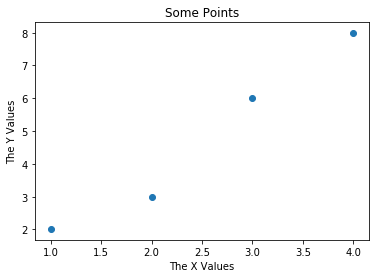

In [3]:
# To plot the points (1,2), (2,3), (3,6), (4,8) we would list the x values and the corresponding y values:
plt.scatter([1,2,3,4], [2,3,6,8])
plt.title('Some Points')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

# Bar Charts
- If we do the exact same thing but using the function bar(...) we get a bar chart:

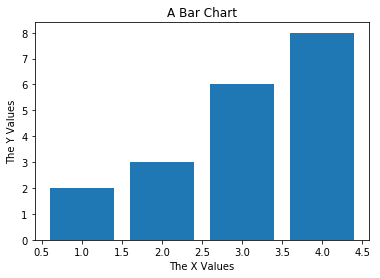

In [4]:
# To plot the points (1,2), (2,3), (3,6), (4,8) we would list the x values and the corresponding y values:
plt.bar([1,2,3,4], [2,3,6,8])
plt.title('A Bar Chart')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

- If the Y axis is probabilities, we get a Distribution of the probabilities among the outcomes of an experiment:

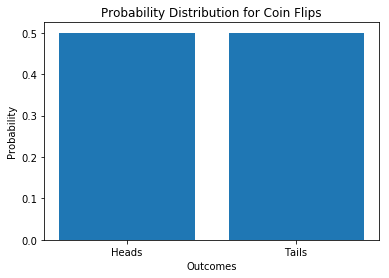

In [5]:
# Show the distribution of probabilities for a coin flip:
x = [0,1]
y = [0.5, 0.5]
labels = ['Heads', 'Tails']


plt.xticks(x, labels)
plt.bar(x,y)
plt.title('Probability Distribution for Coin Flips')
plt.ylabel("Probability")
plt.xlabel("Outcomes")
plt.show()

# Curve Plotting 
- If you call plot(..) instead of scatter(..) you will display a curve created by connecting the points with straight lines

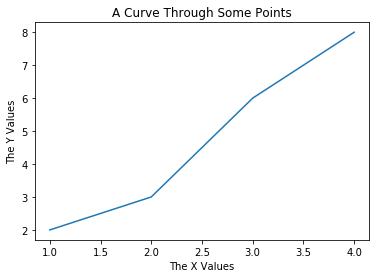

In [6]:
# To plot a curve through the points (1,2), (2,3), (3,6), (4,8) we would use: 
plt.plot([1,2,3,4], [2,3,6,8])
plt.title('A Curve Through Some Points')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

- You can even do both at once!

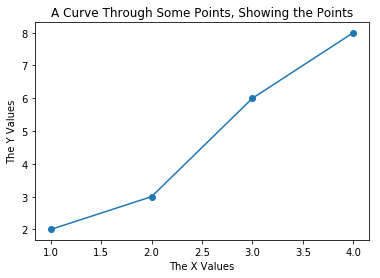

In [7]:
plt.scatter([1,2,3,4], [2,3,6,8])
plt.plot([1,2,3,4], [2,3,6,8])
plt.title('A Curve Through Some Points, Showing the Points')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

## Further Examples of using plot(...)

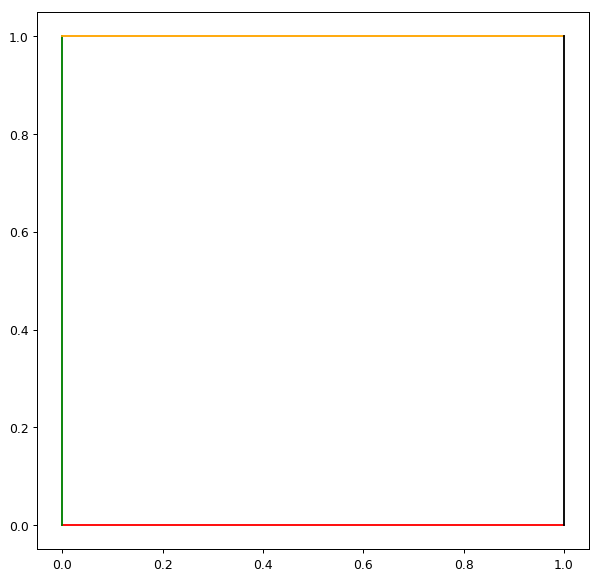

In [8]:
# EXAMPLE: Plotting a square via lines 
plt.figure(num=None, figsize=(8, 8), dpi=89)
plt.plot([0,1],[0,0],color='red') # Line connecting (0,0) to (1,0)
plt.plot([0,0],[0,1],color='green') # Line connecting (0,0) to (0,1)
plt.plot([0,1],[1,1],color='orange') # Line connecting (0,1) to (1,1)
plt.plot([1,1],[0,1],color='black') # Line connecting (1,0) to (1,1)

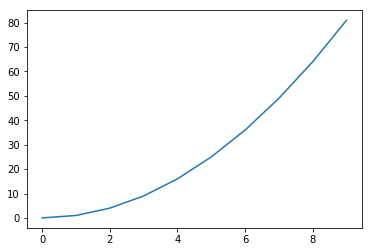

In [9]:
# Plotting a smooth curve for the function x^2
x = [i for i in range(10)]
y = [i**2 for i in x]
plt.plot(x,y)
plt.show()

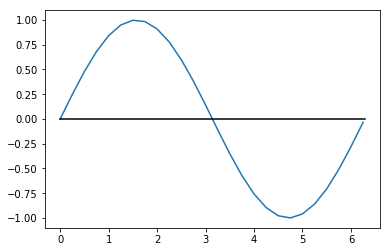

In [10]:
x=np.arange(0,2*np.pi,.25)
y=np.sin(x)
plt.plot(x,y)
plt.plot([0,6.28],[0,0],color='black')

# Histograms
- If you give a list of values to hist(..) it will create a histogram counting how many of each value occur; this list can be unordered;
- You will get a cleaner display if you specify where the edges of the bins are, and make sure the edges of the bins are visible, as shown in this example:

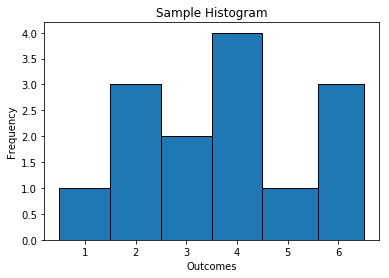

In [11]:
plt.hist([1,2,4,2,6,2,4,5,6,4,6,3,4,3],bins=[.5,1.5,2.5,3.5,4.5,5.6,6.5],edgecolor='black')
plt.title('Sample Histogram')
plt.xlabel("Outcomes")
plt.ylabel("Frequency")
plt.show()

# Problem 1 
Read and understand the function $\texttt{dieRoll(n_trials)}$ below, which simulates the experiment of rolling a fair, six-sided die $\texttt{n_trials}$ times. 
- The sample space is $\{1,2,3,4,5,6\}$. 
- The experiment is equi-probable, i.e., the probability of any particular outcome is $\frac{1}{6}$.
- If we record the outcome for a large number of experiments, we would expect the number of outcomes to be evenly distributed. In other words, for a large number of trials, we would expect $$\frac{\text{number of times we observed a } k}{\texttt{n_trials}} \approx \frac{1}{6}$$ for $k\in \{1,2,3,4,5,6\}$

TO DO: For this first problem, simply provide the single line of Python code which would display a histogram of the results of the experiment for 10000 trials with appropriate labels.  

In [12]:
def roll_die(n_trials = 10000, seed=-1):
    """
    - Simulates rolling a fair die n_trials times, i.e., a number is selected from 
    - (1,2,3,4,5,6) with equal probability n_trials times. By default, n_trials is set to 10000
    - randint(a,b) uniformly and randomly selects an  integer x such that a<= x < b
    - The second argument for randint determines the shape and size of the result array. In this case, we only need
    - a one dimensional array (a list)
    """
    trials_and_results = randint(1,7,(n_trials)) # this creates a 1D array of length n_trials of random integers 1..6
    return trials_and_results

example_trials = roll_die() 

In [13]:
# Solution:   For each problem, you should add a cell and provide your code solution

(array([ 1757.,  1678.,  1592.,  1686.,  1711.,  1576.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.6,  6.5]),
 <a list of 6 Patch objects>)

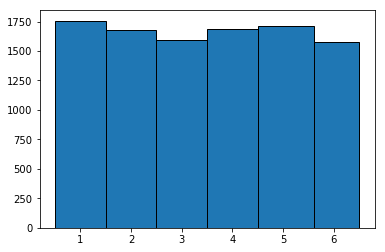

In [14]:
plt.hist([roll_die(10000)],bins=[.5,1.5,2.5,3.5,4.5,5.6,6.5],edgecolor='black')

# Problem 2 

Now we will display the same results showing the distribution of probabilities, instead of an explicit histogram.
- To calculate the probabilities, you will need to count the number of occurrences of each of the outcomes, you may find the function Counter(...) useful for this (Google "numpy Counter" to find out how this works); 
- Once you have the frequency of each outcome, divide by the total number of trials to get the probability for each.

TO DO:  Complete the function stub below which takes the list returned by roll_die(...), or any other experiment returning numerical results, and produces a frequency distribution; this should have the same shape as the histogram, but the Y axis will be probabilities instead of the frequency. Again, create appropriate labels. Demonstrate your function, again, on the list example_trials produced in Problem 1. 

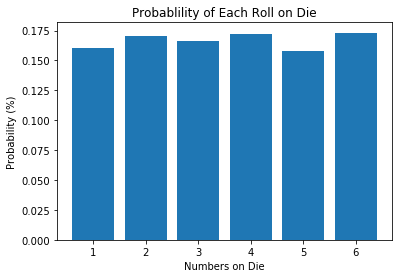

In [15]:
def show_distribution(results, title='Probability Distribution'):
    """
    - Takes a list of numerical outcomes and displays a distribution of the probabilities
    """
    pass 
    x = Counter(results)
    y = max(results)
    M = min(results)
    i = 0
    mylist = []
    for i in range(M,y+1):
        mylist.append(x[i]/len(results))
    mylist2 = []
    o = 1
    for o in range(M,y+1):
        mylist2.append(o)
    plt.bar(mylist2, mylist)
    plt.title('Probablility of Each Roll on Die')
    plt.xlabel("Numbers on Die")
    plt.ylabel("Probability (%)")

show_distribution(example_trials,title='Probability Distribution for Single Die Toss')

# Motivation for Monte Carlo simulation
For the case of a fair die, the distribution is very easily computed. In general, it is very difficult to write down a closed form solution for the distribution of real world events. This is where simulation comes into play-- instead of  mathematically computing the distribution explicitly, you can use this method of repeating experiments, and recording outcomes to understand the probabilistic rules governing some real world event. When you can come up with an analytical result, this is a nice way of confirming its correctness!

# Problem 3
You will now do the same thing you did in the previous problems, but with a new experiment: instead of rolling one die and recording the value, you will simulate rolling $n$ dies and recording their sum. For example, if $n=2$ and  the first die shows up as a 3, and the second die shows up as a 1, the sum (and the value we record) would be 4. 
TO DO:  Complete the two functions stubs below and then demonstrate by providing the single line of code which would print out the probability distribution for rolling 2 dice 10,000 times. 

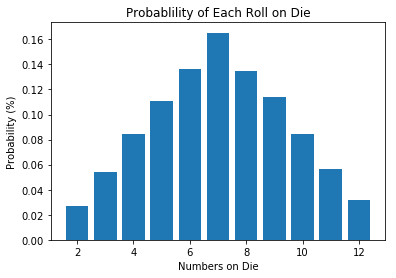

In [16]:
# Hint, use help() on randint or Google!
# You can generate random lists of numbers with one line of code
# This function should look very similar to rollDie()

def roll_and_add_dice(n_dice ,n_trials = 10000):
    """
    - Perform the trials
    - randint(a,b) uniformly and randomly selects an  integer x such that a<= x < b
    - The second argument determins the shape of the result. In this case, we only need
    - a one dimensional array ( a list)
    """
    i = 0
    j = 0
    final = [0]*10000
    for i in range(n_trials):
        for j in range(n_dice):  
            final[i] = final[i] + randint(1,7)
    x = Counter(final)
    return final

# Now use show_distribution to display results
show_distribution(roll_and_add_dice(2, ),title='Probability Distribution for Rolling Two Die')

# Problem 4

TO DO:  For the final problem of this lab, provide code which will display the probability distribution for the experiment of running the "flip a coin until you get a head" experiment 10,000 times.

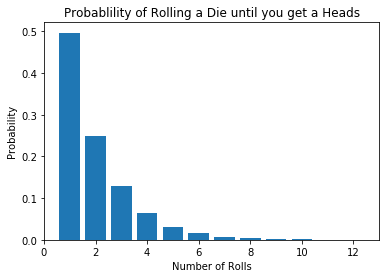

In [17]:
# returns true if flip of fair coin is heads

def fair_coin_flip():
    return (randint(0,2) == 1)

# return the number of flips until you get a head; minimum is 1 and there is no upper bound
def flip_coin_until_heads():
    y = 1
    while True:
        x = fair_coin_flip()
        if (x == True):
            return y
        y = y+1
        
def ten_thousand_flips():
    myList = []
    o = 0
    for o in range(10000):
        myList.append(flip_coin_until_heads())      
    yay = Counter(myList)
    m = max(yay)
    M = min(yay)
    list2 = []
    for o in range(M,m+1):
        list2.append(o)
    list3 = []
    for o in range(M,m+1):
        list3.append(yay[o]/10000)
    plt.bar(list2, list3)
    plt.title('Probablility of Rolling a Die until you get a Heads')
    plt.xlabel("Number of Rolls")
    plt.ylabel("Probability")
    return

x = ten_thousand_flips()
        

# Problem 5

For our final problem, we will simulate the experiment described in Problem 8 of HW 01: we will produce a scatter plot of random points in a 2D grid. 

TO DO:  Complete the following function stub which will produce a scatter plot of random points (x,y) where each of x and y is produced by calls to the function np.uniform(0,1,[n_trials]).

[ 0.34762364  0.13163059  0.42664584]
[ 0.6982491   0.92932315  0.64773455]


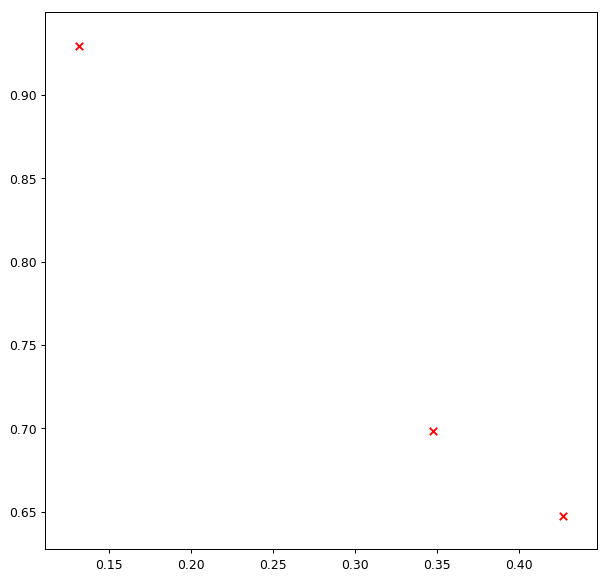

In [26]:
def random_plane_plot(n_trials):
    """Uses numpy's uniform function to build a list of x and y values with the following properties: 
    - x_vals should have len n_trials
    - y_vals should have len n_trials
    - Each value in x and y should be between 0 and 1 
    HINT: use the same code to build x_vals and y_vals
    """
    x_vals = np.random.uniform(0.0,1.0, n_trials)
    print(x_vals)
    y_vals = np.random.uniform(0.0,1.0, n_trials)
    print(y_vals)
    plt.figure(num=None, figsize=(8, 8), dpi=89) 
    plt.scatter(x_vals, y_vals, marker='x', c='red')
    plt.show() 
    return

random_plane_plot(3)

# Challenge Problem (no credit, but we will be impressed!)

Write code to run the exact experiment specified in Problem 8, show the scatter plot, and give the probabilities of  events (a) - (c) as they resulted in an experiment with 10,000 trials. 